In [84]:
## library
import yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [135]:
## Index list
index_list = ["^GSPC", "^KS11", "^VIX"]
sector_list = ["XLK", "XLV", "XLF", "XLY", "XLI", "XLP", "XLE", "XLU", "XLB", "XLC", "XLRE", "SPYD"]

In [136]:
## Test
end_date = datetime.now()
start_date = end_date - timedelta(days = 35*365)
# start_date = datetime(1981, 9, 25)

total_list = index_list + sector_list
total_data = yfinance.download(total_list, start = start_date, end = end_date)[['Open', 'Close', 'Volume']]

[*********************100%***********************]  15 of 15 completed


In [180]:
slice_end_date = datetime.now()
slice_start_date = slice_end_date - timedelta(days = 15*365)

slice_data = total_data[slice_start_date:slice_end_date]

period = "4W"

total_price = slice_data['Open'].copy()

mean_price = total_price.rolling(window = 5).mean().resample(period)            # 노이즈 제거
mean_price_val = mean_price.last()[1:]                                          # 가격 값
mean_price_std = mean_price.std()[1:].fillna(0)                                 # 가격 변동

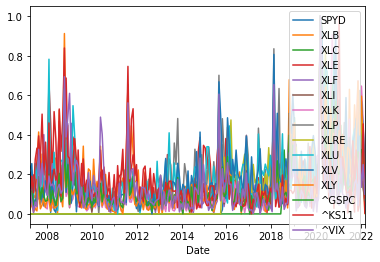

In [181]:
((mean_price_std-mean_price_std.min())/(mean_price_std.max()-mean_price_std.min())).plot()
plt.show()

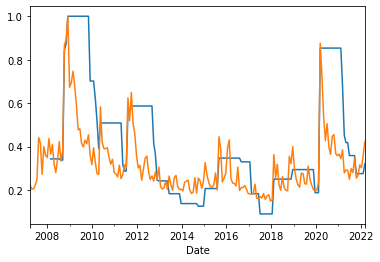

In [182]:
totalmax_vix = max(mean_price_val["^VIX"])
totalmin_vix = min(mean_price_val["^VIX"])
max_vix = ((mean_price_val["^VIX"]-totalmin_vix)/(totalmax_vix-totalmin_vix)).rolling(window = 13).max().dropna()

max_vix.plot()
(mean_price_val["^VIX"]/totalmax_vix).plot()
plt.show()

In [183]:
total_timeid = max_vix.index

buy_time = pd.to_datetime([])
sell_time = pd.to_datetime([])

for timeid in max_vix[max_vix.diff()>0].index:
    if (total_timeid.shape[0] - np.where(total_timeid == timeid)[0]) > 12:
        buy_time = buy_time.append(total_timeid[np.where(total_timeid == timeid)[0]])
        sell_time = sell_time.append(total_timeid[np.where(total_timeid == timeid)[0] + 12])

In [186]:
target = ["^GSPC", "^KS11"]
index_yield = (np.array(mean_price_val.loc[sell_time])- np.array(mean_price_val.loc[buy_time]))/mean_price_val.loc[buy_time]

print(pd.DataFrame(np.cumprod(index_yield + 1)).tail())
print(max_vix[max_vix.diff()>0].index)


                SPYD       XLB       XLC       XLE       XLF       XLI  \
2015-01-25       NaN  2.523313       NaN  1.842722  1.669058  1.980276   
2015-09-06       NaN  2.870581       NaN  1.888760  1.709622  2.252251   
2018-02-18  0.979141  2.496434       NaN  1.733075  1.505579  2.026966   
2018-12-23  1.075704  2.960661  1.225361  1.728821  1.888601  2.527094   
2020-03-15  1.310760  4.560635  1.915439  2.240607  2.606677  3.510096   

                  XLK       XLP      XLRE       XLU       XLV       XLY  \
2015-01-25   4.036949  1.932873       NaN  1.273401  2.302812  3.955296   
2015-09-06   4.717937  2.253892       NaN  1.573454  2.488574  4.326489   
2018-02-18   4.604288  2.138210  1.065118  1.690597  2.633258  4.388141   
2018-12-23   6.382131  2.499155  1.268760  1.929555  2.980806  5.333524   
2020-03-15  10.648298  2.881785  1.369293  1.998049  3.818721  8.674916   

               ^GSPC     ^KS11      ^VIX  
2015-01-25  2.315022  3.947514  0.007203  
2015-09-06  2.5662